In [16]:
# Module 22 – Naive Bayes Case Study on Titanic Dataset

# 1) Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [17]:
# 2) Load Dataset
df = pd.read_csv('/Users/priyaraut/Desktop/study/tutedude_assaignment/assg_5/dataset/train.csv')  

In [18]:
# Explore First Rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Check info & missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# 3) Data Cleaning & Preprocessing
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with most frequent
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/var/folders/f3/xjsmh0793w3fdk_66svl0pm80000gn/T/ipykernel_12317/1678584937.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/f3/xjsmh0793w3fdk_66svl0pm80000gn/T/ipykernel_12317/1678584937.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [21]:
# Cabin has many missing → drop it
# Also drop Name, Ticket, PassengerId (not predictive)
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [22]:

df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
# 4) Encode Categorical Variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [24]:

# 5) Train-Test Split
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# 6) Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

Accuracy: 0.776536312849162


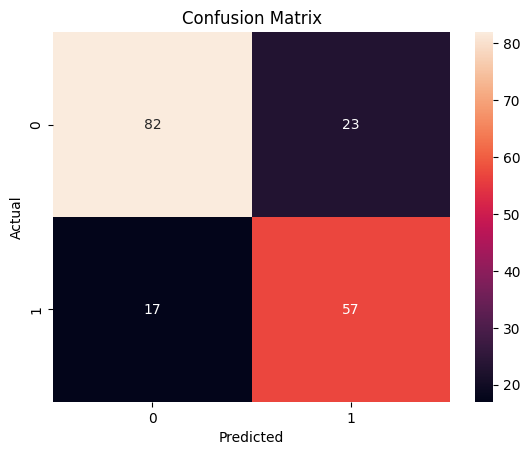

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [26]:
# 7) Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [27]:
# 8) Insights
print("""
Result Analysis:
- Naive Bayes gives a baseline accuracy for predicting survival.
- Categorical features like Sex and Embarked strongly influence survival.
- Further enhancements possible with feature engineering or other classification models.
""")



Result Analysis:
- Naive Bayes gives a baseline accuracy for predicting survival.
- Categorical features like Sex and Embarked strongly influence survival.
- Further enhancements possible with feature engineering or other classification models.

